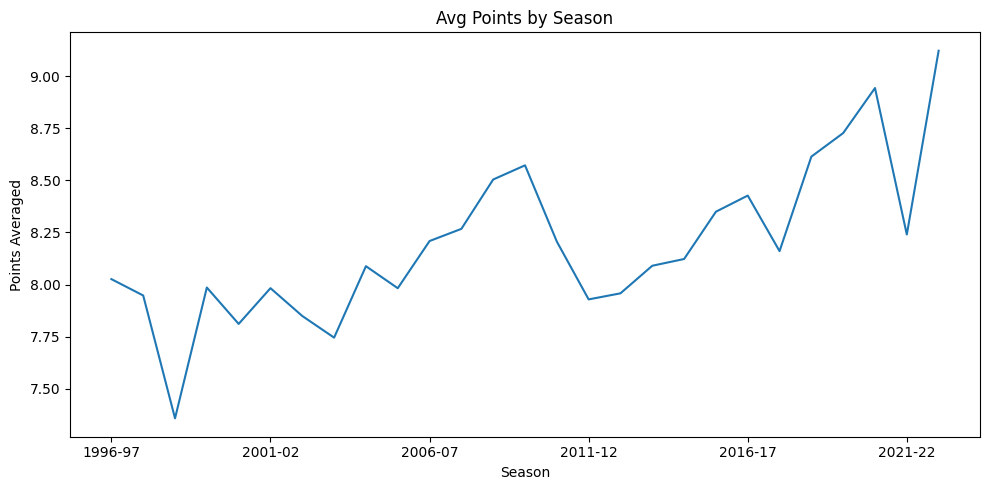

In [1]:
# Average points by season (Graph #1)
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Get csv dataset
nba = pd.read_csv("/kaggle/input/nba-players-data/all_seasons.csv")

avg_ppg_by_season = nba.groupby("season")['pts'].mean()

# Produce line graph
graph1 = avg_ppg_by_season.plot(figsize=(10,5))
graph1.set_xlabel('Season')
graph1.set_ylabel('Points Averaged')
plt.title("Avg Points by Season")
plt.tight_layout()

player_height
(160.02, 193.04]    8.702703
(193.04, 198.12]    8.274393
(198.12, 203.2]     8.609960
(203.2, 208.28]     7.577633
(208.28, 231.14]    7.768280
Name: pts, dtype: float64


Text(0.5, 1.0, 'Height vs Points')

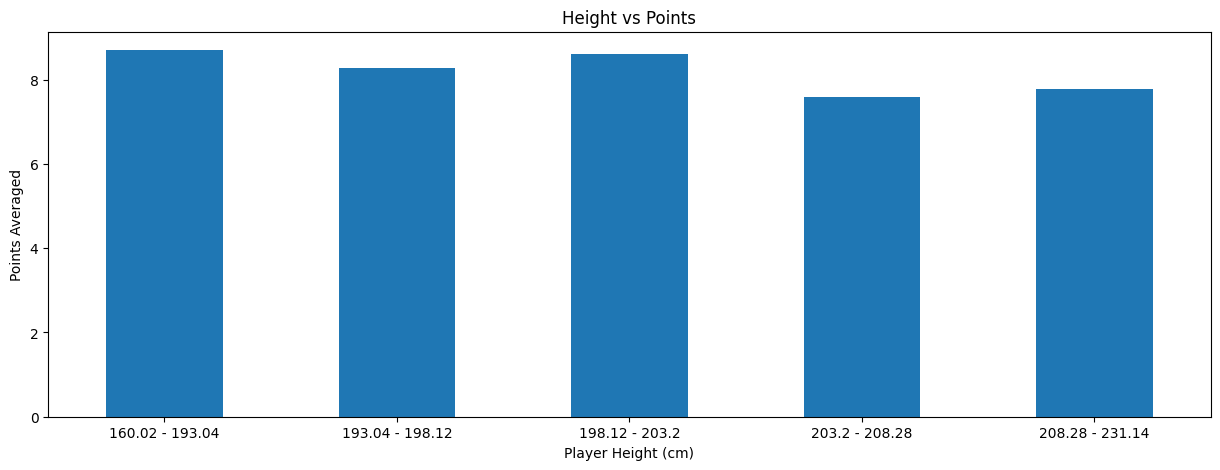

In [2]:
# Average points by height (Graph #2)
avg_ppg_by_height = nba.groupby("player_height")['pts'].mean()

# Split into percentiles of 20 
p0 = nba['player_height'].quantile(0)
p20 = nba['player_height'].quantile(0.2)
p40 = nba['player_height'].quantile(0.4)
p60 = nba['player_height'].quantile(0.6)
p80 = nba['player_height'].quantile(0.8)
p100 = nba['player_height'].quantile(1)

# Categorize players with percentile bins
height_bins = [p0, p20, p40, p60, p80, p100]
binned_heights = pd.cut(nba['player_height'], bins=height_bins)
average_per_height = nba.groupby(binned_heights, observed=True)['pts'].mean()
print(average_per_height)

# Produce bar graph
plt.figure(figsize=(15,5))
graph2 = average_per_height.plot.bar()
graph2.set_xlabel('Player Height (cm)')

# Fix tick labels on x-axis
plt.xticks(
    ticks=[0,1,2,3,4], 
    labels=["160.02 - 193.04", "193.04 - 198.12", "198.12 - 203.2", "203.2 - 208.28", "208.28 - 231.14"],
    rotation = 0)

graph2.set_ylabel('Points Averaged')                
plt.title('Height vs Points')


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


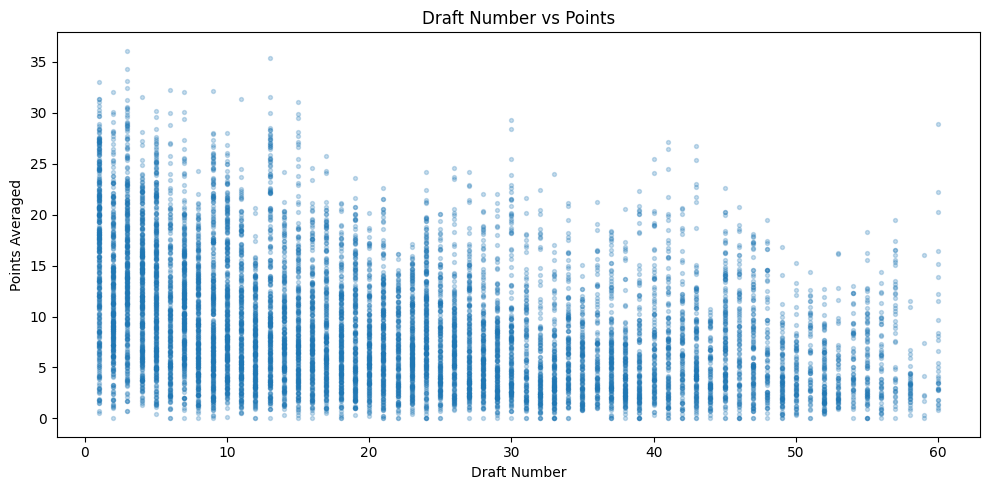

In [3]:
# Average points by draft number (Graph #3)
# Note: NaN draft numbers produce RuntimeWarning, but they are ignored in the plot

# Clean column to have no string type draft numbers or unknowns
nba['draft_number'] = nba['draft_number'].replace("Undrafted", np.nan).astype("float").dropna()

# Only want to go up to 60 draft picks (modern)
standardized_draft_number = nba.loc[ 
    (nba['draft_number'] <= 60) & 
    (nba['draft_number'] > 0)]

# Produce scatter plot
plt.figure(figsize=(10,5))
plt.scatter(standardized_draft_number['draft_number'], standardized_draft_number['pts'], alpha=0.25, s=8)
plt.xlabel('Draft Number')
plt.ylabel('Points Averaged')
plt.title('Draft Number vs Points')
plt.tight_layout()